In [1]:
import sys

sys.path[0] = '/bbkinghome/mbarrera/git_supply/nndp/src'

import sys
import pandas as pd
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optax
import nndp

In [2]:
from model import u, m, F, policy, T, k_star

In [3]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
params, nn = nndp.initialize_deep_nn(subkey,
                                n_states = 3,
                                n_actions = 1,
                                nodes_per_layer = 128,
                                hidden_layers = 5,
                                hidden_activation = jax.nn.tanh,
                                output_activation = [jax.nn.relu])


def normalize_params(params:dict)->dict:
    for layer in params.keys():
        params[layer]['w'] = params[layer]['w'] / jnp.sqrt(params[layer]['w'].shape[0])
    return params

params = normalize_params(params)

In [4]:
key, subkey = jax.random.split(key)

params,result = nndp.core.train(key = subkey,
               params = params,
               nn = nn,
               policy = policy,
               u = u,
               m = m,
               F = F,
               T = T,
               N_simul = 100,
               batch_size = 100,
               epochs = 50,
               optimizer = optax.adam(1e-3)
               )

2024-05-17 11:26:36.534637: W external/xla/xla/service/hlo_rematerialization.cc:2946] Can't reduce memory use below 11.62GiB (12473571272 bytes) by rematerialization; only reduced to 11.63GiB (12490932608 bytes), down from 11.63GiB (12490932608 bytes) originally


Objective value on training iteration 49 out of 50: 37.584701538085944

<Axes: title={'center': 'Convergence of Objective Function'}, xlabel='Epoch', ylabel='Objective Function'>

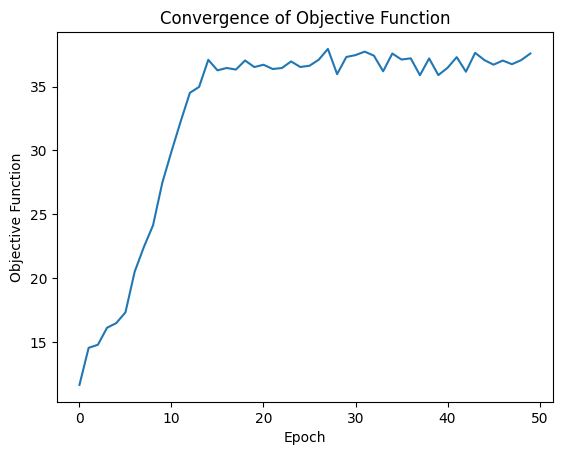

In [5]:
result.plot_convergence()

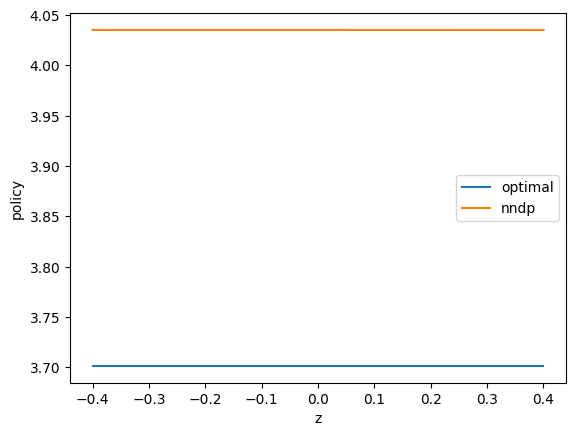

In [7]:
z = jnp.linspace(-0.4,0.4)
k = 1
state = jnp.column_stack([jnp.zeros_like(z), z, jnp.ones_like(z)*k])
fig, ax = plt.subplots()
ax.plot(z, k_star(z), label='optimal')
ax.plot(z, policy(state, params, nn), label='nndp')
ax.set(xlabel='z',ylabel='policy')
ax.legend()
fig.show()

In [7]:
policy(jnp.array([10,-1,10]), params, nn)

Array([[4.0025544]], dtype=float32)